### **Installation**
LoopDetectR is on CRAN and can be installed within R by

In [ ]:
# Before running the R code cells in jupyter notebook,
# initialize the R kernel by this line of code:
# IRkernel::installspec()

In [1]:
# Download and install
install.packages("LoopDetectR")

Installing package into 'C:/Users/Admin/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)

also installing the dependencies 'igraph', 'numDeriv'




package 'igraph' successfully unpacked and MD5 sums checked
package 'numDeriv' successfully unpacked and MD5 sums checked
package 'LoopDetectR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Admin\AppData\Local\Temp\RtmpaOiKF4\downloaded_packages


In [7]:
install.packages("deSolve")  # if not already installed
install.packages("numDeriv") # if not already installed

Installing package into 'C:/Users/Admin/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'deSolve' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Admin\AppData\Local\Temp\RtmpaOiKF4\downloaded_packages


Installing package into 'C:/Users/Admin/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'numDeriv' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Admin\AppData\Local\Temp\RtmpaOiKF4\downloaded_packages


In [1]:
# Load package
library("LoopDetectR")

### **In brief and quick start**
The package LoopDetectR enables determining all feedback loops of an ordinary differential equation (ODE) system at user-defined values of the model parameters and of the modelled variables.

The following call reports (up to 10) feedback loops for an ODE system determined by a function, here the example function `func_POSm4`, at variable values s_star (here, these are all equal to 1). Additional arguments to the example function are supplied.

In [19]:
# Load example ODE system with function func_POSm4, 4 variables
data("func_POSm4")
# Example variable values
s_star <- rep(1,4)
# Further arguments of func_POSm4, in addition: time t as argument
klin <- rep(1,8)
knonlin <- c(2.5,3)

# compute loops
res_tab <- find_loops_vset(func_POSm4,vset=list(s_star),t=1,klin=klin,
                           knonlin=knonlin,max_num_loops=10)
# The loop list is reported
res_tab$loop_rep[[1]]

loop,length,sign
<I<list>>,<dbl>,<dbl>
"1, 1",1,-1
"2, 2",1,-1
"3, 3",1,-1
"4, 4",1,-1
"3, 4, 1,....",4,-1
"3, 4, 2, 3",3,1


In [20]:
# This is the sixth loop of the list. It is a positive feedback loop (sign in 
# the loop list equals +1) of length 3 in that variable 3 regulates variable 4, 
# variable 4 regulates variable 2, and variable 2 regulates variable 3. 
res_tab$loop_rep[[1]][6,]

,loop,length,sign
,<I<list>>,<dbl>,<dbl>
6,"3, 4, 2, 3",3,1


In [18]:
# The corresponding signed Jacobian matrix
res_tab$jac_rep[[1]]

-1,0,0,-1
1,-1,0,1
0,1,-1,0
0,0,1,-1


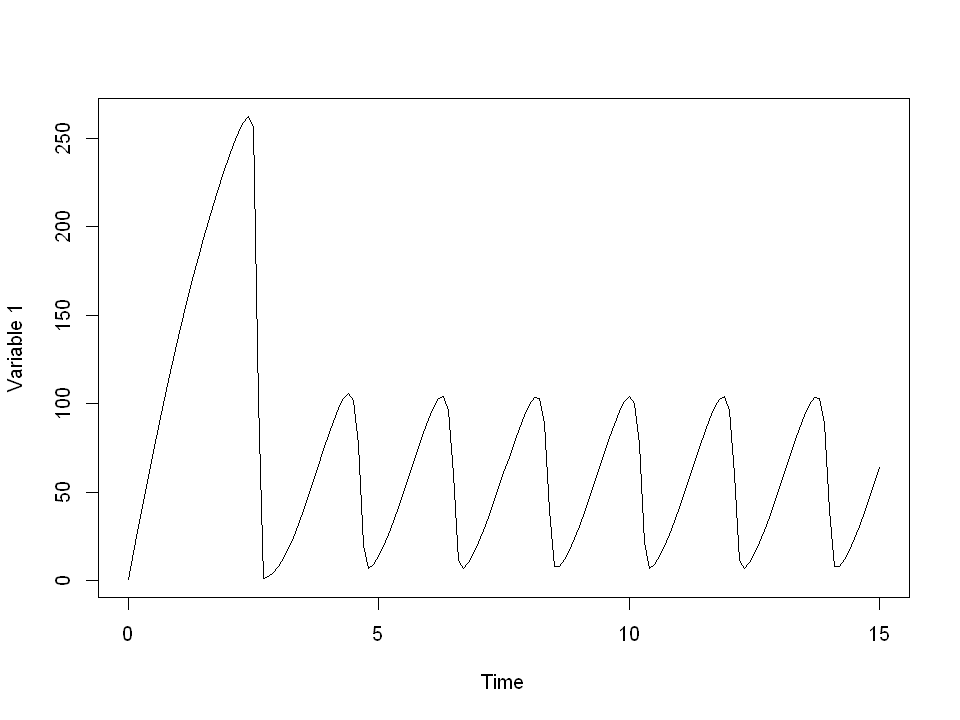

In [21]:
# Load example ODE system with function func_POSm4, 
# Positive feedback chain model from [Baum et al., 2016], 4 variables
data(func_POSm4)
# The function func_POSm4 returns a vector, but deSolve needs the vector within
# a list as output. Therefore, we define a function that simply puts the output 
# of func_POSm4 into a list:
func_POSm4_list <- function(t,x,klin,knonlin){list(func_POSm4(t,x,klin,knonlin))}
# Kinetic parameters of the model, supplied as arguments to func_POSm4
klin <- c(165,0.044,0.27,550,5000,78,4.4,5.1)
knonlin <- c(0.3,2)
# Solve the system using deSolve
sol <-  deSolve::ode(y = rep(1,4), times = seq(0,15,0.1), func = func_POSm4_list, 
                     parms=klin, knonlin=knonlin)
# The solution of the 4-variable system is oscillatory, showing only the first 
# variable here
plot(sol[,1],sol[,2],type='l',xlab='Time',ylab ='Variable 1')

In [ ]:
# Make beautiful plot using ggplot2 / tidyverse
install.packages("tidyverse") # if not already installed
library(tidyverse)

Installing package into 'C:/Users/Admin/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)

also installing the dependencies 'rematch', 'blob', 'DBI', 'gargle', 'cellranger', 'ids', 'rematch2', 'timechange', 'systemfonts', 'textshaping', 'selectr', 'conflicted', 'dbplyr', 'dtplyr', 'forcats', 'googledrive', 'googlesheets4', 'haven', 'lubridate', 'modelr', 'ragg', 'readxl', 'reprex', 'rstudioapi', 'rvest'





  There is a binary version available but the source version is later:
        binary source needs_compilation
selectr  0.4-2  0.5-0             FALSE

package 'rematch' successfully unpacked and MD5 sums checked
package 'blob' successfully unpacked and MD5 sums checked
package 'DBI' successfully unpacked and MD5 sums checked
package 'gargle' successfully unpacked and MD5 sums checked
package 'cellranger' successfully unpacked and MD5 sums checked
package 'ids' successfully unpacked and MD5 sums checked
package 'rematch2' successfully unpacked and MD5 sums checked
package 'timechange' successfully unpacked and MD5 sums checked
package 'systemfonts' successfully unpacked and MD5 sums checked
package 'textshaping' successfully unpacked and MD5 sums checked
package 'conflicted' successfully unpacked and MD5 sums checked
package 'dbplyr' successfully unpacked and MD5 sums checked
package 'dtplyr' successfully unpacked and MD5 sums checked
package 'forcats' successfully unpacked and MD5 su

installing the source package 'selectr'


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error: object 'sol_long' not found


In [ ]:
library(deSolve)
library(tidyverse)

# solve system
sol_for_plot <- as.data.frame(
  ode(
    y = rep(1,4),
    times = seq(0, 15, 0.1),
    func = func_POSm4_list,
    parms = klin,
    knonlin = knonlin
  )
)

# rename columns for clarity
colnames(sol_for_plot) <- c("time", "X1", "X2", "X3", "X4")

# reshape to long format
sol_long <- sol_for_plot %>%
  pivot_longer(cols = X1:X4, names_to = "species", values_to = "value")


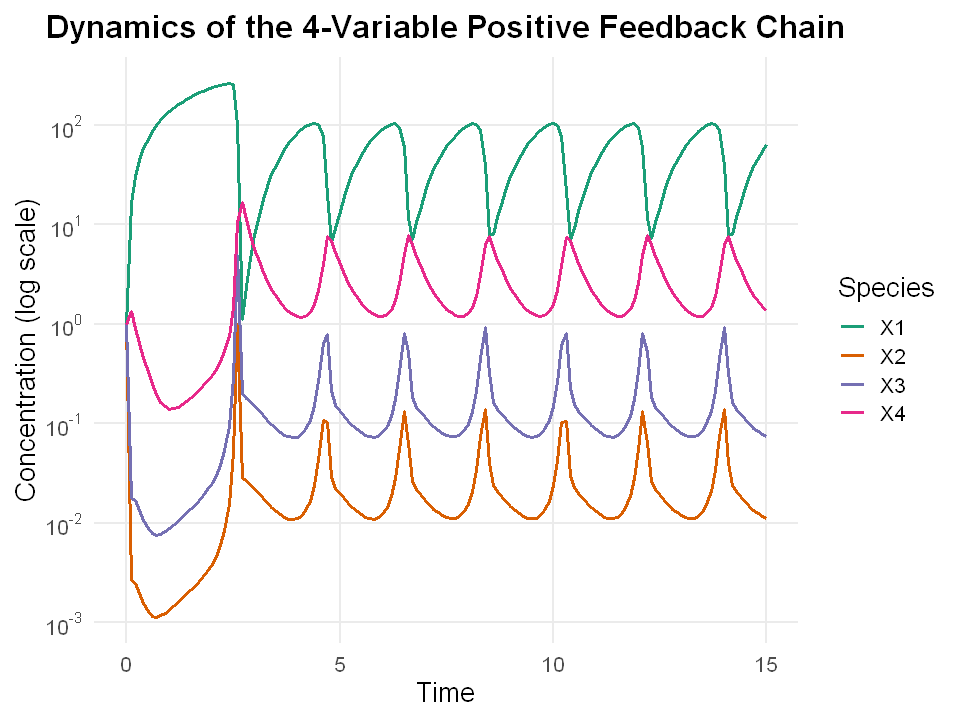

In [15]:
# ggplot(sol_long, aes(x = time, y = value, colour = species)) +
#   geom_line(size = 1.1) +
#   scale_colour_brewer(palette = "Dark2") +
#   labs(
#     title = "Dynamics of the 4-Variable Positive Feedback Chain",
#     x = "Time",
#     y = "Concentration",
#     colour = "Species"
#   ) +
#   theme_minimal(base_size = 16) +
#   theme(
#     plot.title = element_text(face = "bold", hjust = 0.5),
#     legend.position = "right",
#     panel.grid.minor = element_blank()
#   )

options(repr.plot.width = 8, repr.plot.height = 6)

plot1 <- ggplot(sol_long, aes(x = time, y = value, colour = species)) +
  geom_line(size = 1.1) +
  scale_colour_brewer(palette = "Dark2") +
  scale_y_log10(
    breaks = scales::trans_breaks("log10", function(x) 10^x),
    labels = scales::trans_format("log10", scales::math_format(10^.x))
  ) +              # ← log₁₀ transformation
  labs(
    title = "Dynamics of the 4-Variable Positive Feedback Chain",
    x = "Time",
    y = "Concentration (log scale)",
    colour = "Species"
  ) +
  theme_minimal(base_size = 16) +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5),
    panel.grid.minor = element_blank()
  )

plot1
# ggsave("POSm4_plot.png", plot1, width = 10, height = 8, units = "in", dpi = 300)


In [34]:
dir.create("results", showWarnings = FALSE)

In [35]:
svg("results/posm4.svg", width = 10, height = 8)
print(plot1)
dev.off()

agg_record_757164869 
                   2

### **Calculating the Jacobian matrix**
The function jacobian from the numDeriv package can be used to determine numerically the Jacobian matrix of an ODE system at a certain set of values for the variables, `s_star`. The approach is that of finite differences (with real step) or complex step approach, the latter of which is supposed to deliver more exact results [Martins et al., 2003].

The input function, in the example `func_POSm4` (positive feedback chain model from [Baum et al., 2016]) defines the time derivatives of the modelled variables as a vector: 
$f_i(s)=dS_i/dt$. Note that only those input arguments to the function that encode the modelled variables (and hence in whose direction the partial derivatives are taken) are allowed to be called `x`.

In [22]:
# Set the last point of the numeric solution as point of interest, omit the 
# first column (it contains the time)
s_star <- sol[dim(sol)[1],2:dim(sol)[2]]
s_star

1           2           3           4 
63.90085476  0.01116462  0.07481702  1.37597225

In [23]:
klin <- c(165,0.044,0.27,550,5000,78,4.4,5.1)
knonlin <- c(0.3,2)
j_matrix <- numDeriv::jacobian(func_POSm4,s_star,method="complex",
                               t=1,klin=klin,knonlin=knonlin,)
j_matrix

-1.2396132,0,0.0,-85.9719
0.9696132,-5550,0.0,85.9719
0.0000000,550,-82.4,0.0000
0.0000000,0,78.0,-5.1000


In [24]:
signed_jacobian <- sign(j_matrix)
signed_jacobian

-1,0,0,-1
1,-1,0,1
0,1,-1,0
0,0,1,-1


### **Computing all feedback loops and useful functions for loop search**
The Jacobian matrix is used to compute feedback loops in the generated interaction graph. The default function for this is `find_loops`, in that strongly connected components are determined to reduce runtime. For smaller systems, the function `find_loops_noscc` skips this step and thus can be faster. The optional second input argument, `max_num_loops`, sets an upper limit to the number of detected and reported loops and thus can prevent overly long runtime (but also potentially not all loops are returned).

In [25]:
# Determine the loop_list from Jacobian matrix j_matrix
loop_list <- find_loops(j_matrix)
loop_list

loop,length,sign
<I<list>>,<dbl>,<dbl>
"1, 1",1,-1
"2, 2",1,-1
"3, 3",1,-1
"4, 4",1,-1
"3, 4, 1,....",4,-1
"3, 4, 2, 3",3,1


In [26]:
# Use the signed Jacobian matrix to determine the loop_list give the same result
loop_list <- find_loops(signed_jacobian)
loop_list

loop,length,sign
<I<list>>,<dbl>,<dbl>
"1, 1",1,-1
"2, 2",1,-1
"3, 3",1,-1
"4, 4",1,-1
"3, 4, 1,....",4,-1
"3, 4, 2, 3",3,1


In [27]:
# Retrieve fifth loop
loop_list[5,1] 

[[1]]
[1] 3 4 1 2 3


In [28]:
# In order to obtain the vector of the order of variables of a loop, you have to 
# call the list element
loop_list[5,1][[1]]

[1] 3 4 1 2 3

In [29]:
# Retrieve all loops of length 4
loop_list[loop_list$length==4,]

,loop,length,sign
,<I<list>>,<dbl>,<dbl>
5,"3, 4, 1,....",4,-1


In [30]:
loop_summary(loop_list)

,len_1,len_2,len_3,len_4
,<dbl>,<dbl>,<dbl>,<dbl>
all,4,0,1,1
pos,0,0,1,0
neg,4,0,0,1


In [31]:
# Index of node of interest
noi <- 2
# Return all loops from loop_list containing node 2
loop_list[vapply(loop_list$loop,function(x){noi %in% x},logical(1)),]

,loop,length,sign
,<I<list>>,<dbl>,<dbl>
2,"2, 2",1,-1
5,"3, 4, 1,....",4,-1
6,"3, 4, 2, 3",3,1


The `LoopDetectR` function `find_edge` can be used to search a loop list for loops containing specific edges defined by the indices of the ingoing and outgoing nodes. This example returns the indices of all loops with a regulation of node 3 by node 2. These are only two here.

In [32]:
# Obtain the indices of the loops with edge '2 regulates 3' in loop_list 
loop_edge_ind <- find_edge(loop_list,source_node=2,target_node=3);
loops_with_edge_2_to_3 <- loop_list[loop_edge_ind,]
loops_with_edge_2_to_3

,loop,length,sign
,<I<list>>,<dbl>,<dbl>
5,"3, 4, 1,....",4,-1
6,"3, 4, 2, 3",3,1


In [24]:
tempdir()

[1] "C:\\Users\\Admin\\AppData\\Local\\Temp\\RtmpaOiKF4"

In [25]:
# This writes a file 'looplist_func_POSm4.RData'
save(loop_list,file=file.path(tempdir(),'looplist_func_POSm4.RData')) 

In [ ]:
# This loads the object 'loop_list' into the workspace
load(file.path(tempdir(),'looplist_func_POSm4.RData'))

# This saves the loop list into a table with separation by tab
write.table(loop_list,file=file.path(tempdir(),'looplist_func_POSm4.txt'),
            sep='\t',quote=F,row.names=F)
# This reads the loop list back into the R session, as object ll
ll <- read.table(file.path(tempdir(),'looplist_func_POSm4.txt'),
                 header=T,sep='\t')
ll